## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
# Load file


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [23]:
df = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [24]:
# Description
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [25]:
# Transform the dates into datetime format
df.index = pd.to_datetime(df.index)

type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

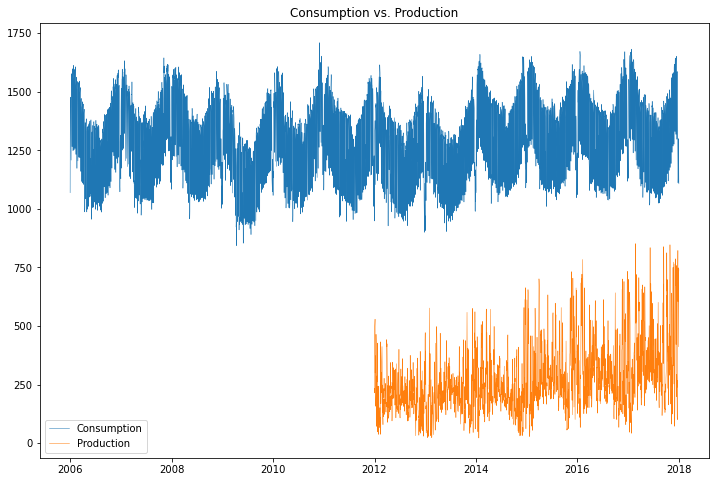

In [11]:
plt.figure(figsize=(12,8))
...
plt.show()

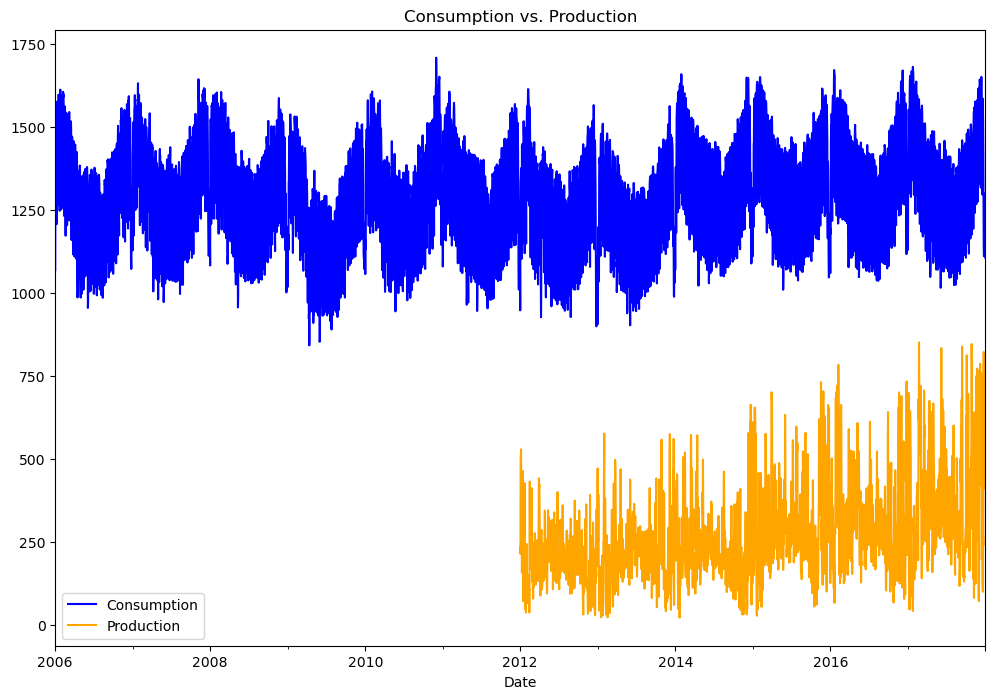

In [26]:
plt.figure(figsize=(12,8))
df['Consumption'].plot(label='Consumption', color='blue')
df['Wind+Solar'].plot(label='Production', color='orange')
plt.title('Consumption vs. Production')
plt.legend(loc='lower left')
plt.show()

We can also avoid plotting lines and simply plot dots for the consumption :

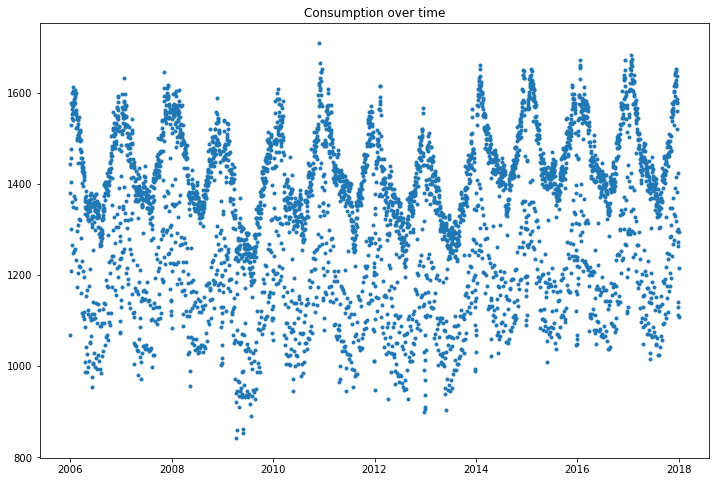

In [12]:
plt.figure(figsize=(12,8))
...
plt.show()

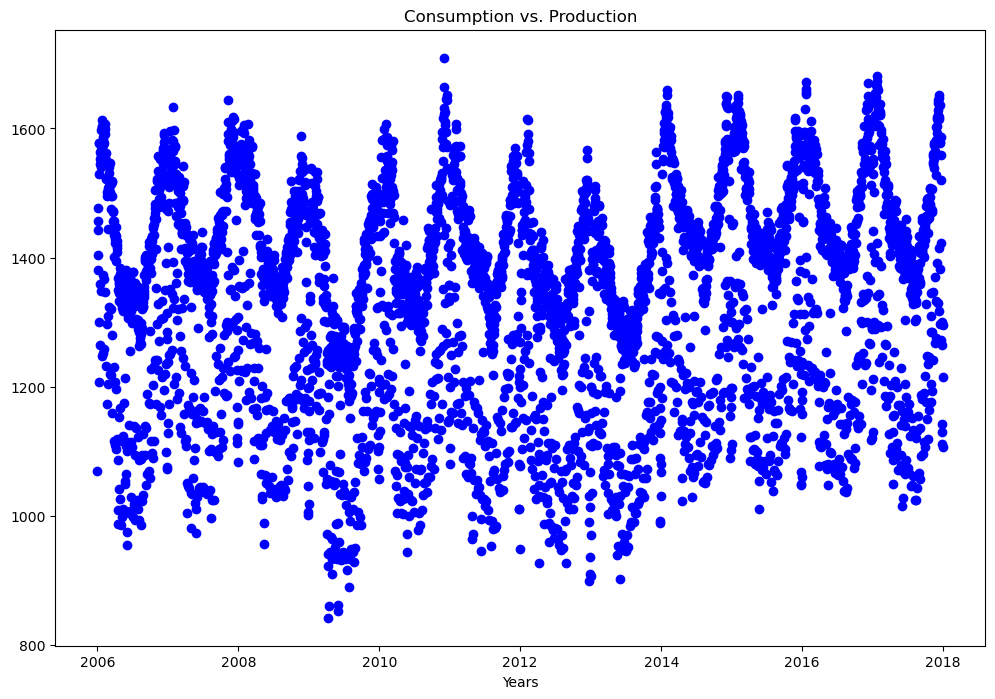

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(df.index, df['Consumption'], label='Consumption', color='blue')
plt.title('Consumption vs. Production')
plt.xlabel('Years')
plt.show()

And plot the production over time :

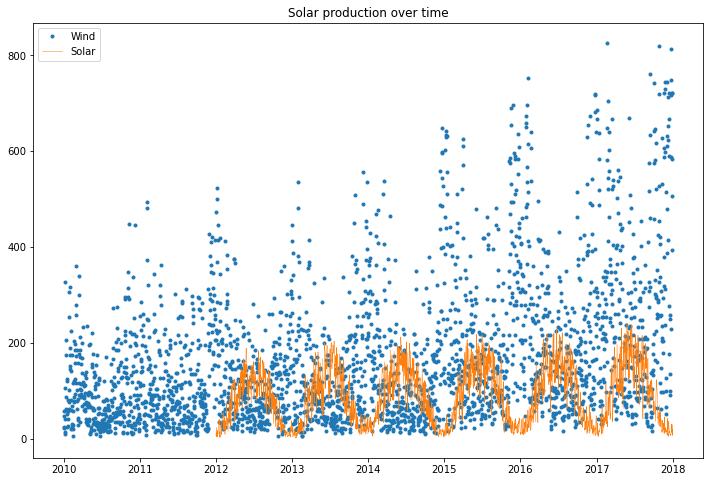

In [13]:
plt.figure(figsize=(12,8))
...
plt.show()

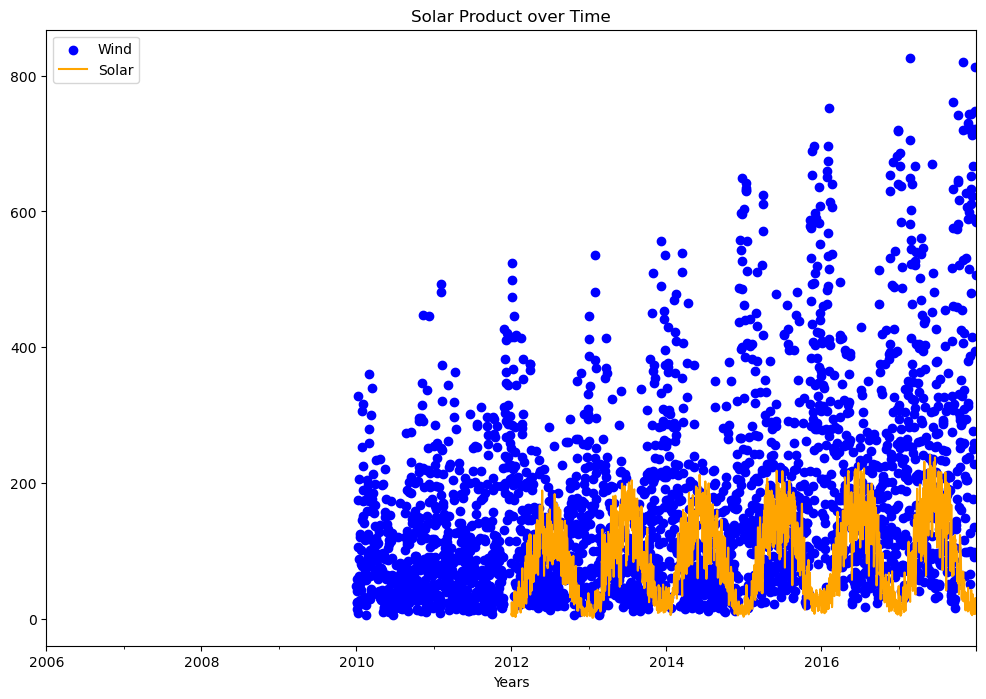

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(df.index, df['Wind'], label='Wind', color='blue')
df['Solar'].plot(label='Solar', color='orange')
plt.title('Solar Product over Time')
plt.xlabel('Years')
plt.legend(loc = 'upper left')
plt.show()

What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

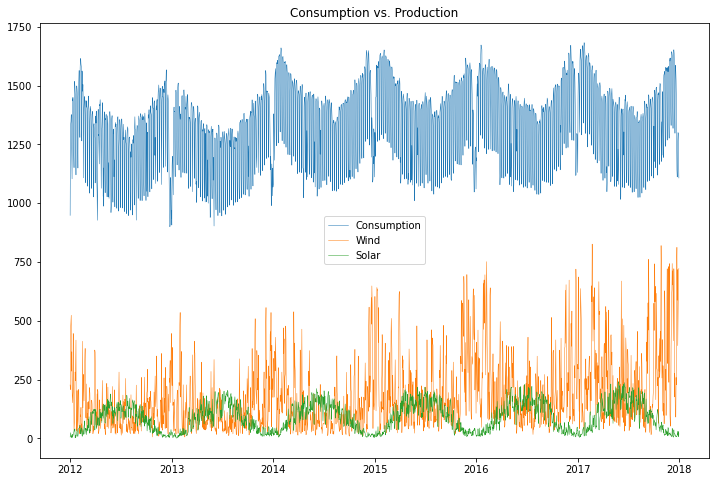

In [14]:
plt.figure(figsize=(12,8))
...
plt.show()

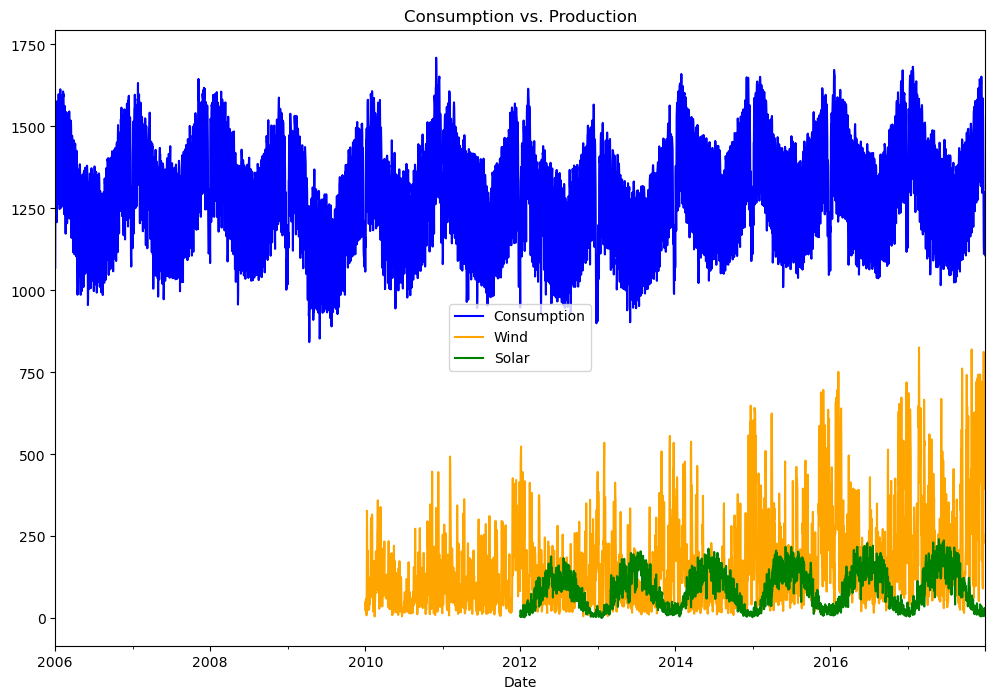

In [38]:
plt.figure(figsize=(12,8))
df['Consumption'].plot(label='Consumption', color='blue')
df['Wind'].plot(label='Wind', color='orange')
df['Solar'].plot(label='Solar', color='green')
plt.title('Consumption vs. Production')
plt.legend(loc='center')
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

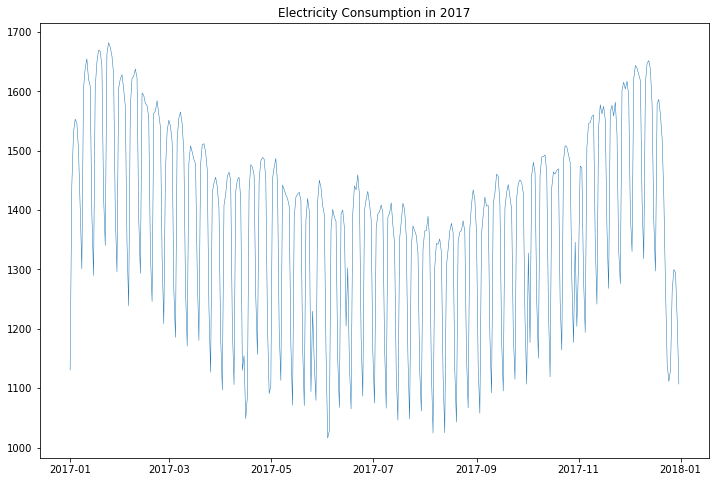

In [15]:
# Plot over the year
plt.figure(figsize=(12,8))
...
plt.show()

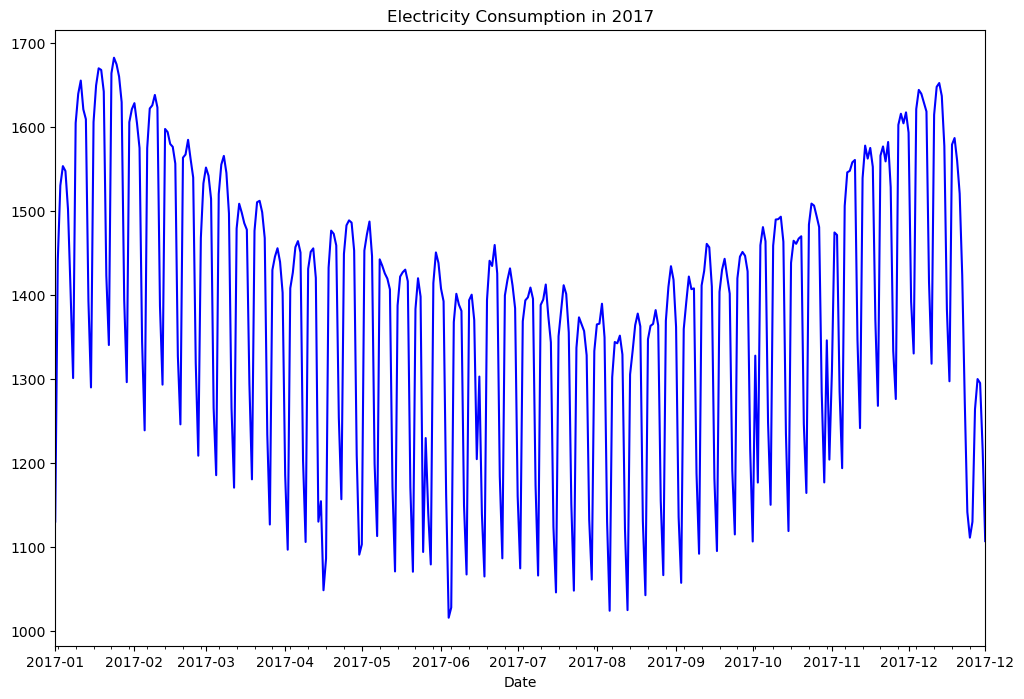

In [44]:
import matplotlib.dates as mdates
plt.figure(figsize=(12,8))
ax = df['Consumption']['2017-01-01':'2017-12-31'].plot(color='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Electricity Consumption in 2017')
plt.show()


It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

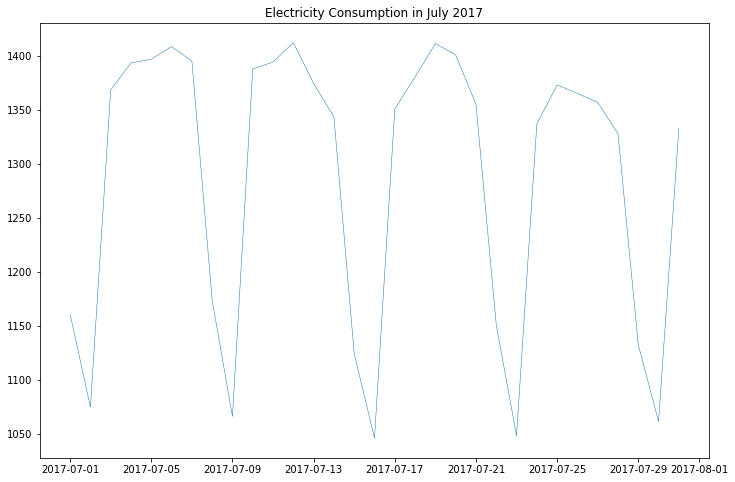

In [16]:
# Plot over a month
plt.figure(figsize=(12,8))
...
plt.show()

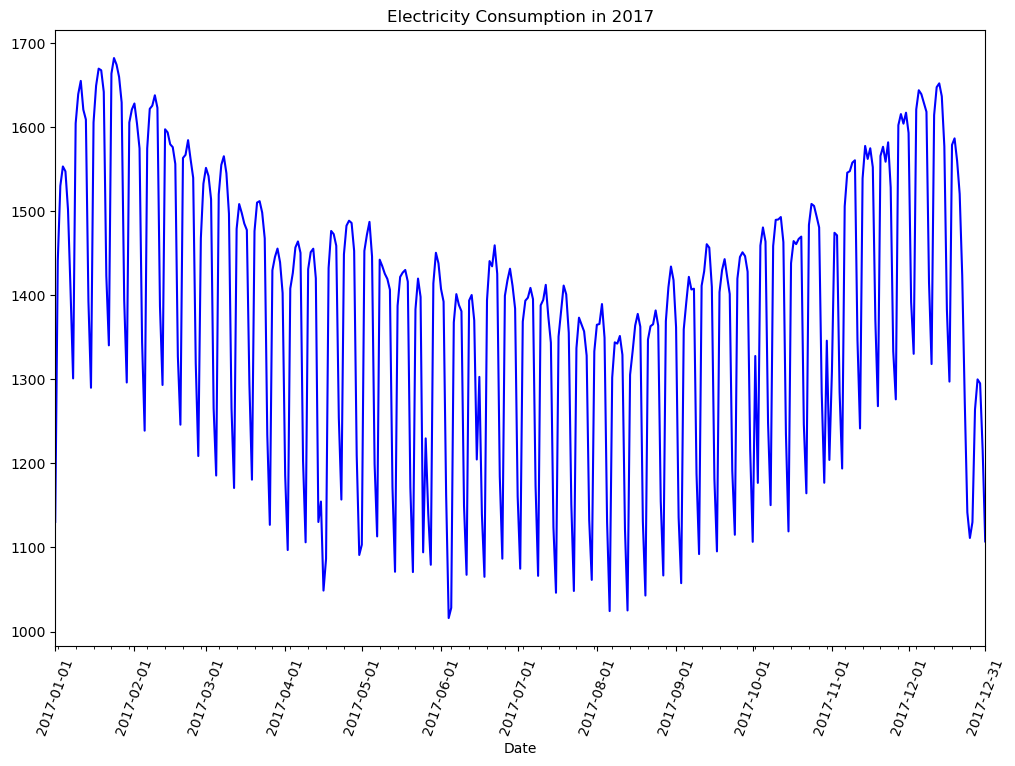

In [48]:
plt.figure(figsize=(12,8))
ax = df['Consumption']['2017-01-01':'2017-12-31'].plot(color='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.tick_params(axis='x',rotation=70)
plt.title('Electricity Consumption in 2017')
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

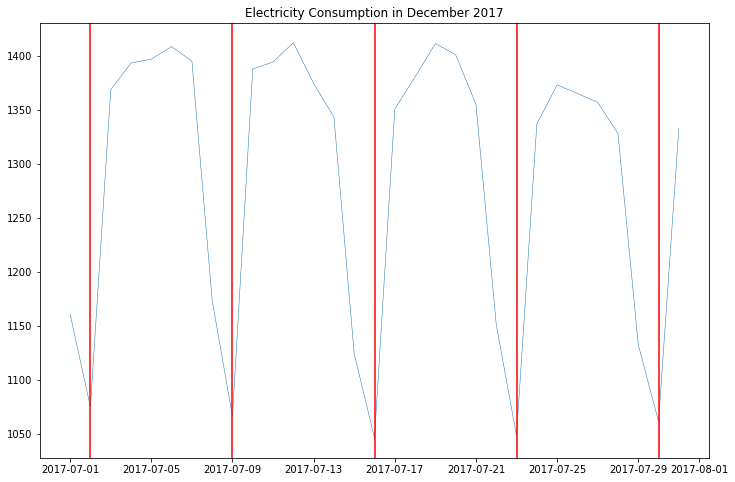

In [22]:
# Plot on Sundays
plt.figure(figsize=(12,8))
...
plt.show()

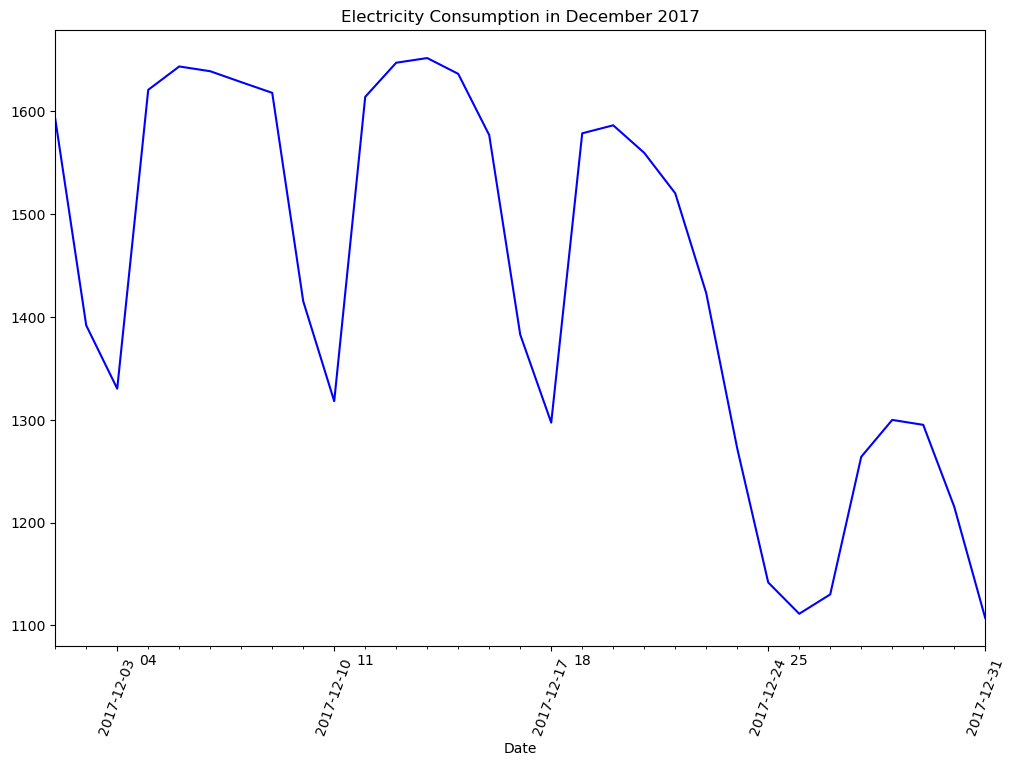

In [55]:
from matplotlib import dates
plt.figure(figsize=(12,8))
ax = df['Consumption']['2017-12-01':'2017-12-31'].plot(color='blue')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.tick_params(axis='x',rotation=70)
plt.title('Electricity Consumption in December 2017')
plt.show()

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [25]:
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2['year'] = ...
df_2['month'] = ...
years = df_2['year'].unique()
print(years)
df_2.head()

,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


In [114]:
import datetime as dt
df_2 = df.reset_index()
df_2['year'] = df_2['Date'].dt.year
df_2['month'] = df_2['Date'].dt.strftime('%b')
years = df_2['year'].unique()
print(years)
df_2

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.18400,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.52100,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.53300,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.21700,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.13100,NaN,NaN,NaN,2006,Jan
...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,Dec
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,Dec
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,Dec
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,Dec


In [78]:
type(df_2.year)

pandas.core.series.Series

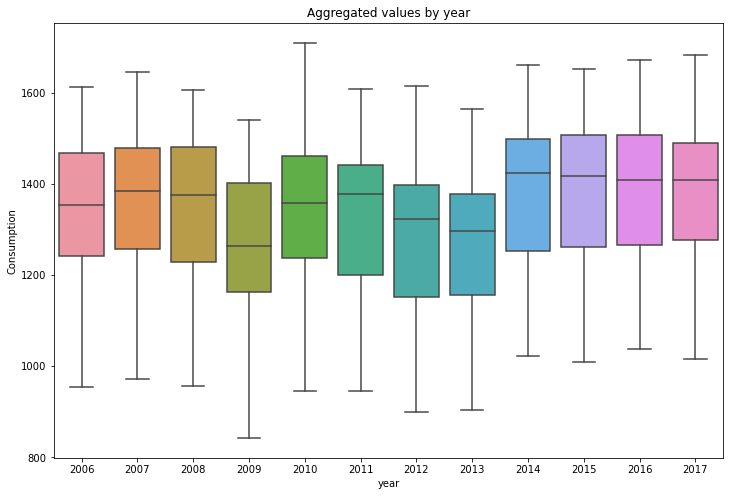

In [26]:
# Boxplot year
import seaborn as sns
plt.figure(figsize=(12,8))
...
plt.show()

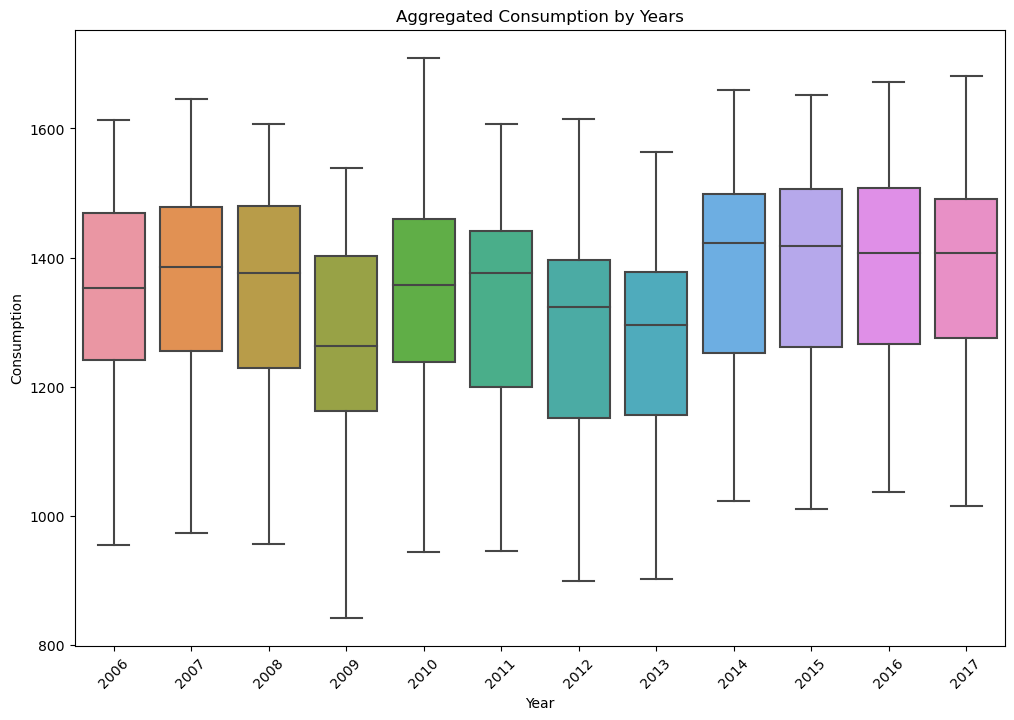

In [81]:
import seaborn as sns
df_2['year'] = df_2['year'].astype(str)

# Plot the boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x='year', y='Consumption', data=df_2)
plt.title('Aggregated Consumption by Years')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

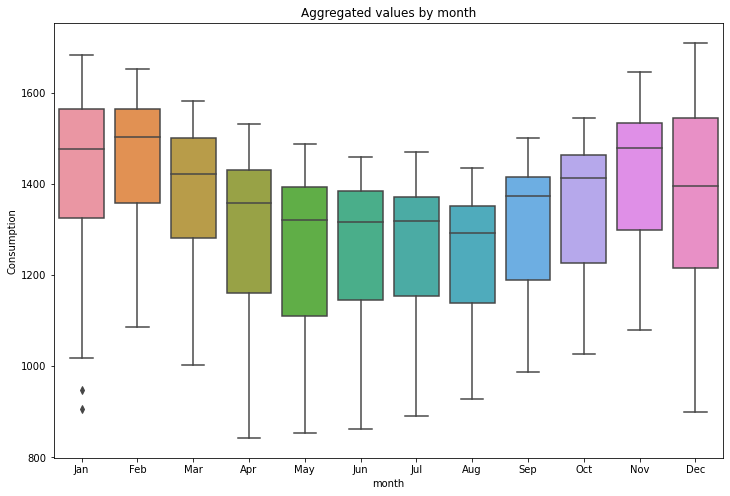

In [27]:
# Boxplot month
plt.figure(figsize=(12,8))
...
plt.show()

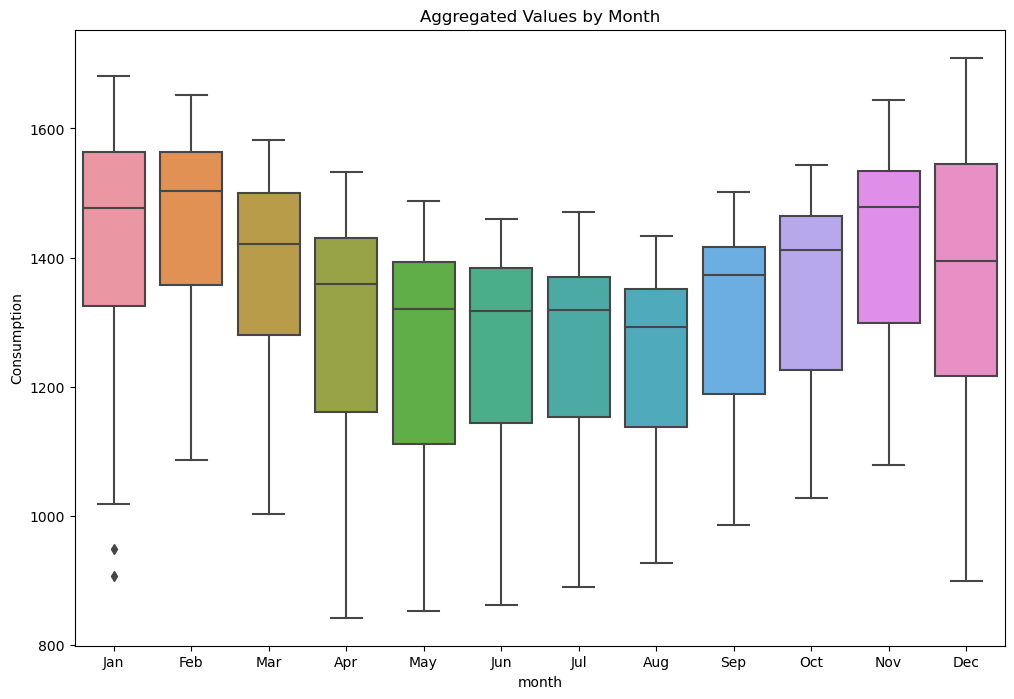

In [85]:
plt.figure(figsize=(12,8))

df_2['month'] = df_2['month'].astype(str)
sns.boxplot(x='month', y='Consumption', data=df_2)
plt.title('Aggregated Values by Month')
plt.xlabel('month')
plt.ylabel('Consumption')
plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

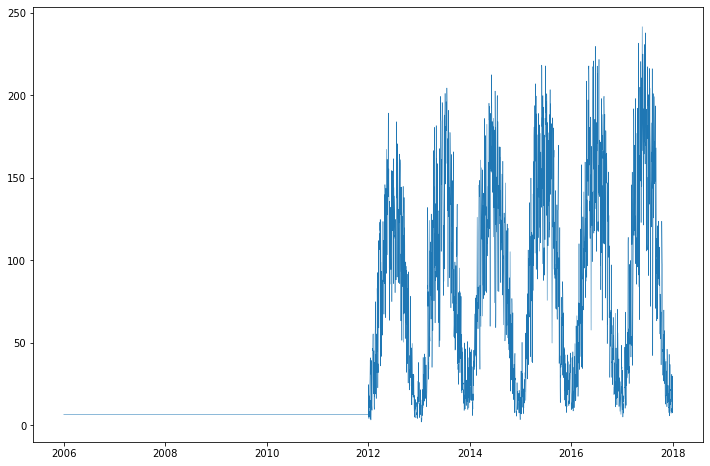

In [28]:
# Plot Solar
plt.figure(figsize=(12,8))
...
plt.show()

In [115]:
df_2.dropna(axis=0, inplace=True)
df_2

,Date,Consumption,Wind,Solar,Wind+Solar,year,month
2191,2012-01-01,948.12800,227.465,6.587,234.052,2012,Jan
2192,2012-01-02,1269.58100,207.327,6.574,213.901,2012,Jan
2193,2012-01-03,1334.74500,473.468,24.679,498.147,2012,Jan
2194,2012-01-04,1347.13600,499.804,14.681,514.485,2012,Jan
2195,2012-01-05,1376.65800,523.851,5.071,528.922,2012,Jan
...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,Dec
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,Dec
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,Dec
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,Dec


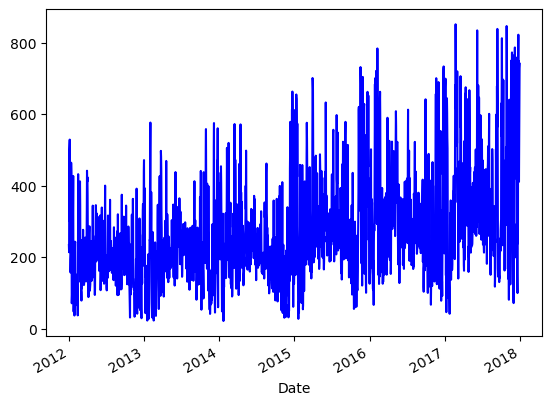

In [116]:
df_2 = df_2.set_index('Date')
df_2['Wind+Solar'].plot(label='Production', color='blue')
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [29]:
# Correlation between consumption and overall production


0.02764784385924093

In [117]:
df_2['Consumption'].corr(df_2['Wind+Solar'])

0.02764784385924091

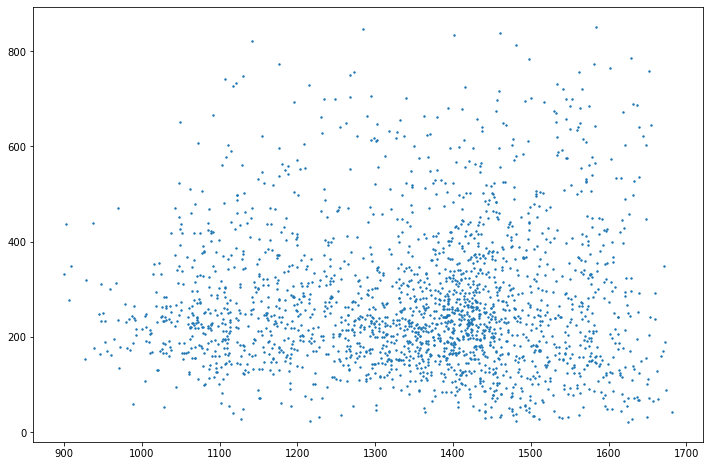

In [30]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()

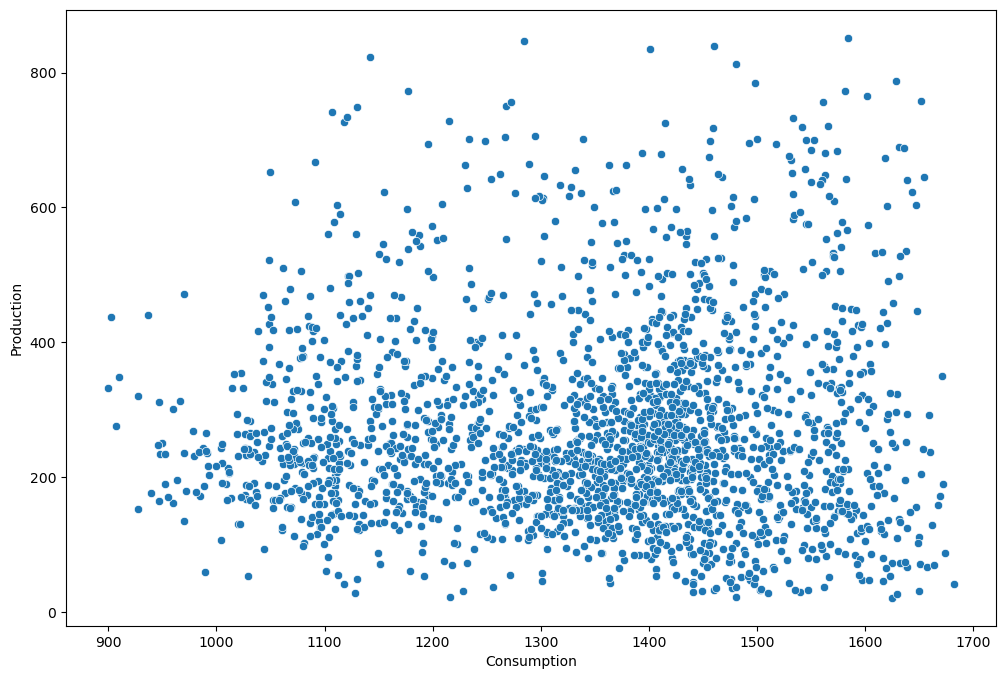

In [120]:
plt.figure(figsize=(12,8))
sns.scatterplot(x ='Consumption', y='Wind+Solar', data=df_2)
plt.xlabel('Consumption')
plt.ylabel('Production')
plt.show()

In [31]:
# Correlation between solar production and wind production
...

-0.3088318295977341

In [121]:
df_2['Solar'].corr(df_2['Wind'])

-0.3088318295977341

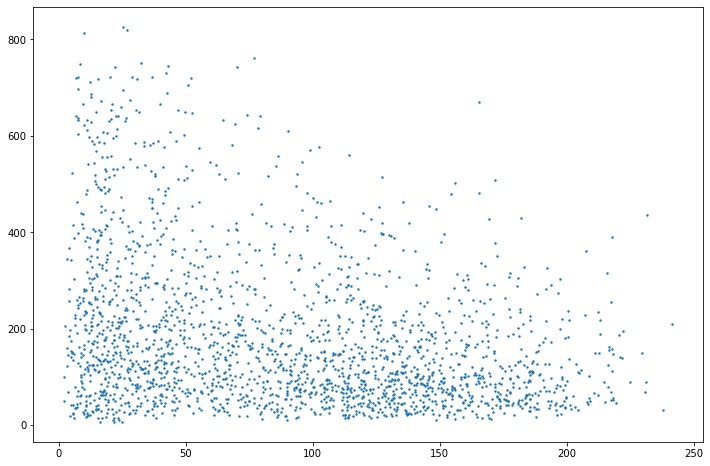

In [32]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()

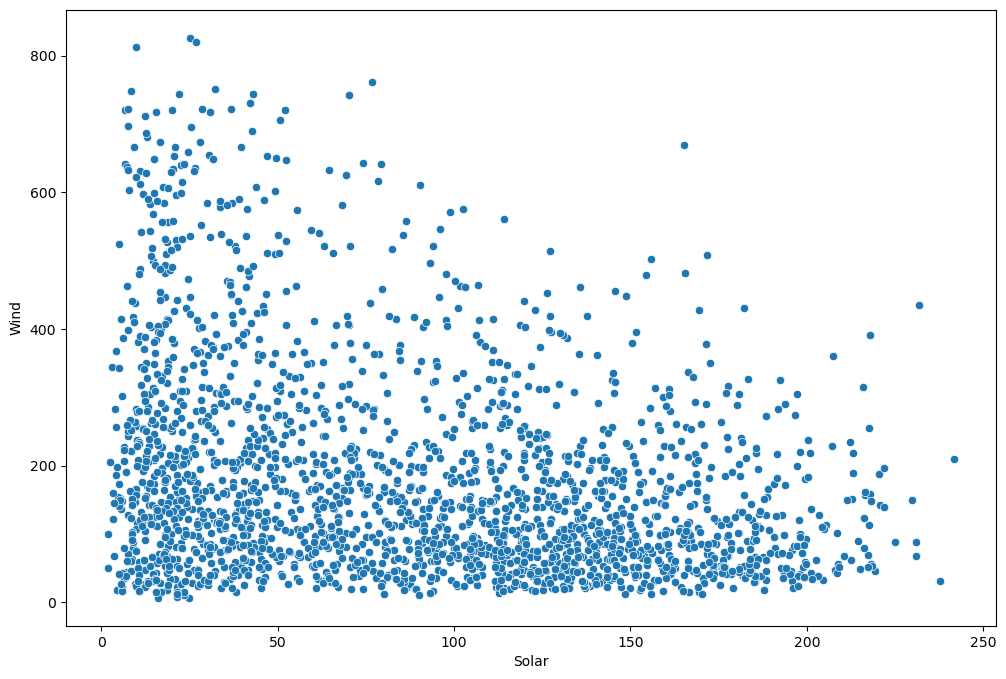

In [122]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Solar', y='Wind', data=df_2)
plt.xlabel('Solar')
plt.ylabel('Wind')
plt.show()

In [33]:
# Correlation between consumption and wind production
...

0.13518640075918514

In [124]:
df_2['Wind'].corr(df_2['Consumption'])

0.13307595241745582

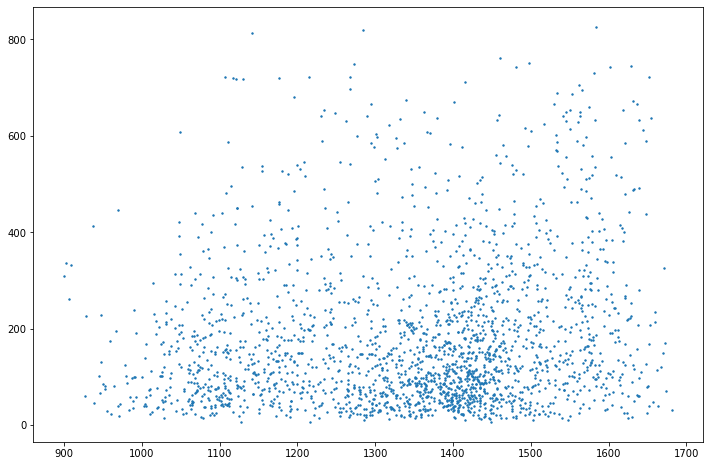

In [34]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()

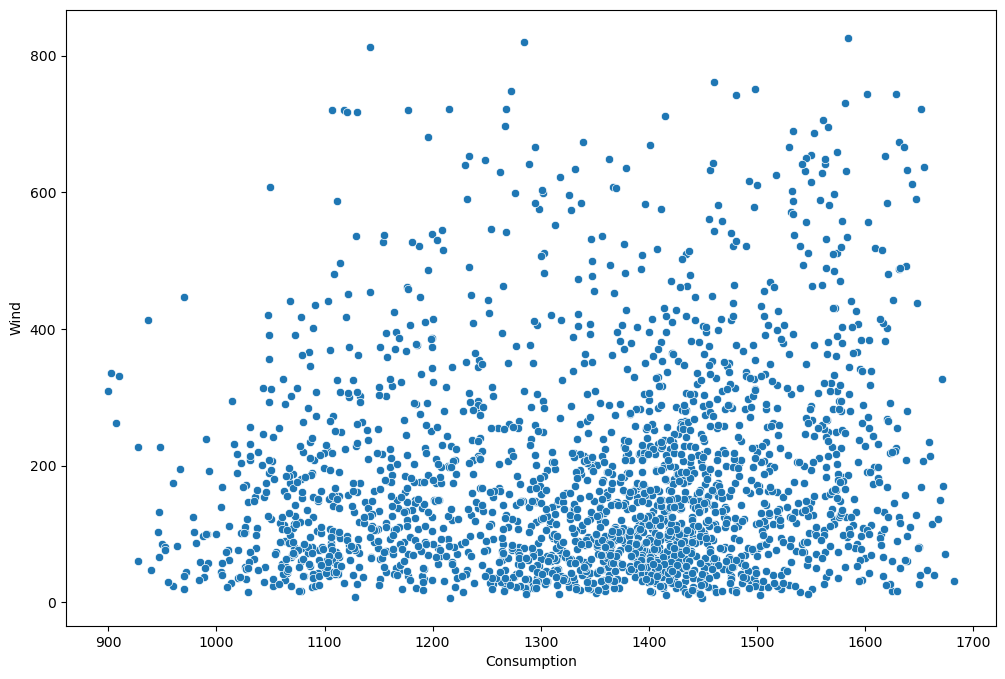

In [126]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Consumption', y='Wind', data=df_2)
plt.xlabel('Consumption')
plt.ylabel('Wind')
plt.show()

In [35]:
# Correlation between consumption and solar production
...

-0.2789426551991438

In [127]:
df_2['Consumption'].corr(df_2['Solar'])

-0.27954273185828227

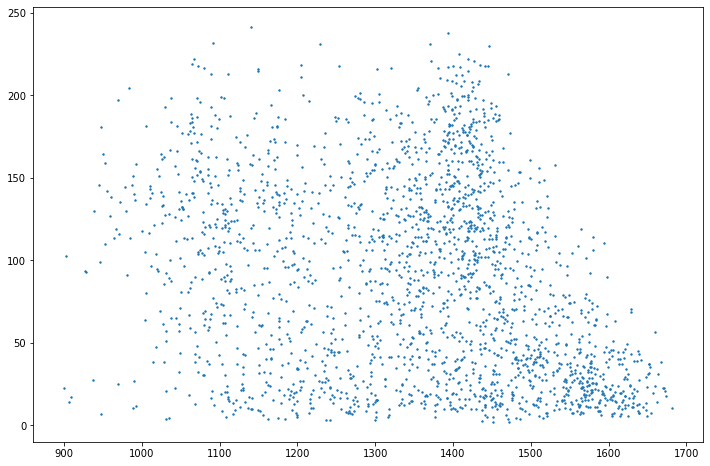

In [38]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()

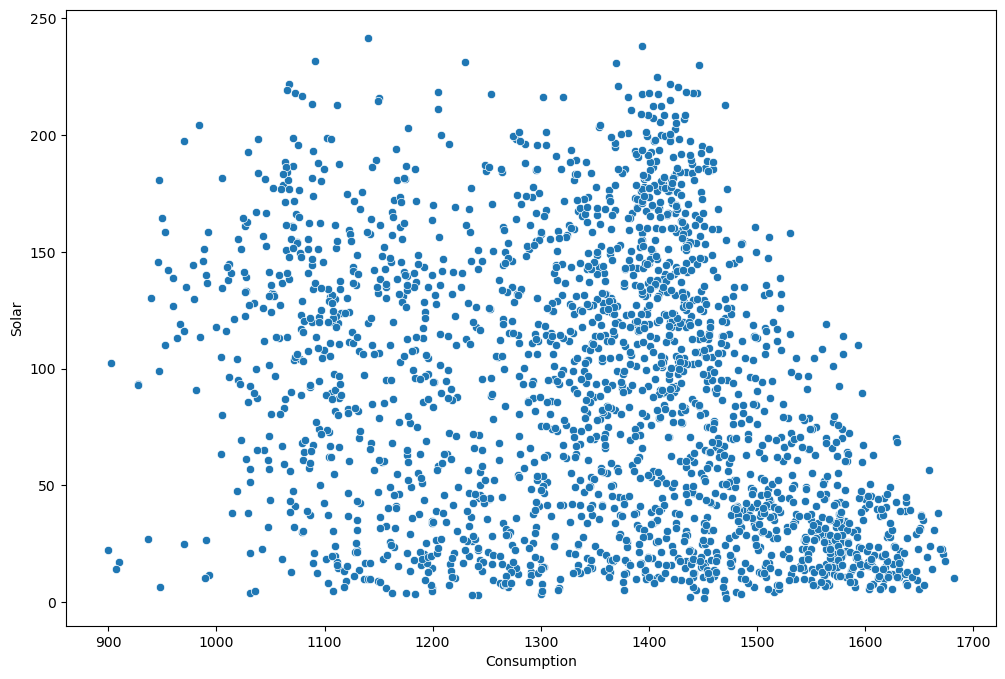

In [128]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Consumption', y='Solar', data=df_2)
plt.xlabel('Consumption')
plt.ylabel('Solar')
plt.show()